## Nama : Arum Maulia
## NIM  : A11.2022.14108
## DM-A11.2022.14108-A11.4507

# Penerapan Teknik Clusterisasi K-Means Untuk Data Kemiskinan di Kabupaten Kudus

## 1. LATAR BELAKANG 

Kemiskinan merupakan suatu permasalahan khusus yang perlu dibahas di Indonesia. Kemiskinan yang terjadi pada suatu daerah tertentu akan berdampak pada pembangunan di Indonesia. Kabupaten Kudus masih menghadapi masalah kemiskinan yang signifikan, dengan puluhan ribu warganya berada di bawah garis kemiskinan. Menurut Badan Pusat Statistik (BPS) menunjukkan bahwa meskipun ada penurunan angka kemiskinan di tahun 2022, penurunan tersebut tidak signifikan dan persentase kemiskinan masih cukup tinggi diangka 7,41 persen. Dengan adanya hal tersebut, Ekperimen ini bertujuan untuk mengklaster Kecamatan diKabupaten Kudus menggunakan metode K-Means. 

## 2. MASALAH

Bagaimana cara mengimplementasikan algoritma K-Means untuk proses Klasterisasi data Tingkat Kemiskinan di Kabupaten Kudus dengan mencari pola cluster kemiskinan berdasarkan atribut Kecamatan, kualitas kondisi rumah tangga, yaitu kepemilikan rumah, kualitas atap/dinding/lantai, sumber penerangan yang digunakan, bahan bakar untuk memasak, dan sumber air minum yang tersedia.

## 3. TUJUAN

Mengelompokkan kecamatan di
Kabupaten Kudus menjadi 3 cluster yaitu miskin, rentan misin, dan mampu berdasarka 
tingkat kemiskinan deng
n mempertimbangkan indikator kualitas kondisi rumah tangga, yaitu kepemilikan rumah, kualitas atap/dinding/lantai, sumber penerangan, bahan bak r
untuk memasak, dan sumber air minum yang tersedia.

## 4. ALUR PENYELESAIAN 

a. Mengumpulkan data yang relevan tentang kemiskinan dan 
indikator kesejahteraan di 9 kecamatan di Kota Kudus
b. Preproccesing Melakukan proses pembersihan dan transformasi data agar siap 
digunakan oleh algoritma K-Means. Termasuk di dalamnya normalisasi data aga 
variabel berada pada skala yang serag.
c. Menganalisis data secara deskriptif untuk 
mengidentifikasi distribusi dan karakteristik dari setiap indikator ekonomi dan sosia.
d. Menentukan jumlah cluster : Menggunakan metode Elbow atau Silhouette Score 
untuk menentukan nilai 3K=3, yang akan merepresentasikan tiga klaster: Miskin, Rentan Miskin, dan Sejahtera
e. Menggunakan algoritma K-Means 
dengan nilai 3K=3 untuk mengelompokkan kecamatan berdasarkan indikator yan
relevan dengan tingkat kemiskinan dan kesejahteraan..lam.sial

 # Import Library

In [264]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Datasets

## Reading and Understanding

In [265]:
df = pd.read_csv('kemiskinan.csv', sep=';') # If the delimiter is a semicolon

In [266]:
df.head()

,No,ID Keluarga P3KE,Dimuktakhirkan Tahun,Provinsi,Kabupaten/Kota,Kecamatan,Desa/Kelurahan,Kode Kemdagri,Desil Kesejahteraan,Persentil,...,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,1,100469014,2021,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,5,...,Sumur Bor,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Tidak,Ya,Tidak,Ya,Tidak
1,2,107530405,2021,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,3,...,Sumur Terlindung,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
2,3,111876773,2021,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,8,...,Sumur Terlindung,Milik sendiri,Bukan Target Sasaran,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ya
3,4,130713310,2021,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,2,...,Sumur Terlindung,Milik sendiri,Tidak Beresiko Stunting,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
4,5,189321171,2022,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,7,...,Sumur Bor,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Ya,Ya,Ya,Tidak,Tidak


In [267]:
# shape of df

df.shape

(95066, 42)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95066 entries, 0 to 95065
Data columns (total 42 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   No                                               95066 non-null  int64 
 1   ID Keluarga P3KE                                 95066 non-null  int64 
 2   Dimuktakhirkan Tahun                             95066 non-null  int64 
 3   Provinsi                                         95066 non-null  object
 4   Kabupaten/Kota                                   95066 non-null  object
 5   Kecamatan                                        95066 non-null  object
 6   Desa/Kelurahan                                   95066 non-null  object
 7   Kode Kemdagri                                    95066 non-null  int64 
 8   Desil Kesejahteraan                              95066 non-null  int64 
 9   Persentil                              

In [269]:
# df description

df.describe()

,No,ID Keluarga P3KE,Dimuktakhirkan Tahun,Kode Kemdagri,Desil Kesejahteraan,Persentil
count,95066.000000,9.506600e+04,95066.000000,9.506600e+04,95066.000000,95066.000000
mean,47533.500000,1.665911e+08,2021.645783,3.319055e+09,2.620916,21.395041
std,27443.334683,3.177602e+07,0.478278,2.778325e+04,1.055652,10.825575
min,1.000000,1.000025e+08,2021.000000,3.319012e+09,1.000000,1.000000
25%,23767.250000,1.337413e+08,2021.000000,3.319032e+09,2.000000,13.000000
50%,47533.500000,1.893604e+08,2022.000000,3.319062e+09,3.000000,22.000000
75%,71299.750000,1.894273e+08,2022.000000,3.319082e+09,3.000000,30.000000
max,95066.000000,1.894914e+08,2022.000000,3.319092e+09,4.000000,40.000000


## Preprocessing Data

In [270]:
# menampilkan jumlah yang hilang atau missing values
print(f"Is null:")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#FEFAE0","color":"#BC6C25","border": "1.5px  solid black"})

Is null:


,No,ID Keluarga P3KE,Dimuktakhirkan Tahun,Provinsi,Kabupaten/Kota,Kecamatan,Desa/Kelurahan,Kode Kemdagri,Desil Kesejahteraan,Persentil,Alamat,Prioritas Verval,Nama Kepala Keluarga,NIK Kepala Keluarga,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Tanggal Lahir Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,Kepemilikan Rumah,Memiliki Simpanan Uang/Perhiasan/Ternak/Lainnya,Jenis Atap,Kualitas Atap,Jenis Dinding,Kualitas Dinding,Jenis Lantai,Kualitas Lantai,Sumber Penerangan,Daya Listrik Terpasang,Bahan Bakar Memasak,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Cleansing

In [271]:
# Calculating the Missing Values % contribution in DF
# Menghitung persentase kontribusi nilai yang hilang (missing values) di setiap kolom dari sebuah DataFrame
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

No                                                 0.00
ID Keluarga P3KE                                   0.00
Dimuktakhirkan Tahun                               0.00
Provinsi                                           0.00
Kabupaten/Kota                                     0.00
Kecamatan                                          0.00
Desa/Kelurahan                                     0.00
Kode Kemdagri                                      0.00
Desil Kesejahteraan                                0.00
Persentil                                          0.00
Alamat                                             0.00
Prioritas Verval                                   0.00
Nama Kepala Keluarga                               0.00
NIK Kepala Keluarga                                0.43
NIK Kepala Keluarga Padan Kemdagri                 0.00
Jenis Kelamin Kepala Keluarga                      0.00
Tanggal Lahir Kepala Keluarga                      0.00
Pekerjaan Kepala Keluarga                       

In [272]:
# Droping rows having missing values
# Menghapus baris yang memiliki missing values (NaN) dari DataFrame
df_new = df.dropna()
df_new.shape

(94661, 42)

In [273]:
# Daftar kolom yang ingin dibuang
columns_to_drop = ['No', 'ID Keluarga P3KE', 'Desa/Kelurahan', 'Dimuktakhirkan Tahun', 'Provinsi', 'Kabupaten/Kota', 'Kode Kemdagri', 'Alamat', 'Nama Kepala Keluarga', 'NIK Kepala Keluarga', 'Tanggal Lahir Kepala Keluarga']

# Menghapus kolom yang tidak diperlukan
df_cleaned = df_new.drop(columns=columns_to_drop)

print(df_cleaned)

       Kecamatan  Desil Kesejahteraan  Persentil  \
0      KALIWUNGU                    1          5   
1      KALIWUNGU                    1          3   
2      KALIWUNGU                    1          8   
3      KALIWUNGU                    1          2   
4      KALIWUNGU                    1          7   
...          ...                  ...        ...   
95061       DAWE                    4         36   
95062       DAWE                    4         36   
95063       DAWE                    4         33   
95064       DAWE                    4         33   
95065       DAWE                    4         39   

                     Prioritas Verval NIK Kepala Keluarga Padan Kemdagri  \
0                              Normal                        Tidak Padan   
1                              Normal                        Tidak Padan   
2                              Normal                              Padan   
3                              Normal                        Tidak Pada

In [274]:
df_cleaned.head()

,Kecamatan,Desil Kesejahteraan,Persentil,Prioritas Verval,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,...,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,KALIWUNGU,1,5,Normal,Tidak Padan,Laki-laki,Tidak/Belum Bekerja,Kosong,Tamat SD/Sederajat,Kawin,...,Sumur Bor,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Tidak,Ya,Tidak,Ya,Tidak
1,KALIWUNGU,1,3,Normal,Tidak Padan,Perempuan,Pedagang,Kosong,Tamat SD/Sederajat,Cerai Mati,...,Sumur Terlindung,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
2,KALIWUNGU,1,8,Normal,Padan,Laki-laki,Wiraswasta,Kosong,Tamat SLTA/Sederajat,Kawin,...,Sumur Terlindung,Milik sendiri,Bukan Target Sasaran,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ya
3,KALIWUNGU,1,2,Normal,Tidak Padan,Laki-laki,Wiraswasta,Kosong,Tamat SLTP/Sederajat,Kawin,...,Sumur Terlindung,Milik sendiri,Tidak Beresiko Stunting,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
4,KALIWUNGU,1,7,Normal,Padan,Perempuan,Pensiunan,Kosong,Tamat SD/Sederajat,Cerai Hidup,...,Sumur Bor,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Ya,Ya,Ya,Tidak,Tidak


In [275]:
# Mengubah data kategorikal menjadi data numerik dengan menggunakan Label Encoding
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['Kecamatan', 'Prioritas Verval', 'NIK Kepala Keluarga Padan Kemdagri', 'Jenis Kelamin Kepala Keluarga', 'Pekerjaan Kepala Keluarga', 'Status Pekerjaan Kepala Keluarga', 'Pendidikan Kepala Keluarga', 'Status Kawin Kepala Keluarga', 'Kepemilikan Rumah', 'Memiliki Simpanan Uang/Perhiasan/Ternak/Lainnya', 'Jenis Atap', 'Kualitas Atap', 'Jenis Dinding', 'Kualitas Dinding', 'Jenis Lantai', 'Kualitas Lantai', 'Sumber Penerangan', 'Daya Listrik Terpasang', 'Bahan Bakar Memasak', 'Sumber Air Minum', 'Memiliki fasilitas Buang Air Besar', 'Resiko Stunting', 'Penerima BPNT', 'Penerima BPUM', 'Penerima BST', 'Penerima PKH', 'Penerima SEMBAKO', 'Penerima Prakerja', 'Penerima KUR']

# Apply Label Encoding to each column
label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

    # Simpan label encoder untuk setiap kolom
    label_encoders[column] = le

# Tampilkan label encoder untuk satu kolom, misalnya "Pendidikan Kepala Keluarga"
print(dict(zip(label_encoders['Pendidikan Kepala Keluarga'].classes_, label_encoders['Pendidikan Kepala Keluarga'].transform(label_encoders['Pendidikan Kepala Keluarga'].classes_))))

{'Masih PT/Akademi': 0, 'Masih SD/Sederajat': 1, 'Masih SLTA/Sederajat': 2, 'Masih SLTP/Sederajat': 3, 'Tamat PT/Akademi': 4, 'Tamat SD/Sederajat': 5, 'Tamat SLTA/Sederajat': 6, 'Tamat SLTP/Sederajat': 7, 'Tdk Tamat SD/Sederajat': 8, 'Tidak/Belum Sekolah': 9}


In [276]:
# Menampilkan mapping antara kategori asli (string atau teks) dan nilai numerik hasil Label Encoding untuk setiap kolom dalam columns_to_encode
for column in columns_to_encode:
    print(f"Kolom: {column}")
    print(dict(zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_))))
    print("\n")

Kolom: Kecamatan
{'BAE': 0, 'DAWE': 1, 'GEBOG': 2, 'JATI': 3, 'JEKULO': 4, 'KALIWUNGU': 5, 'KOTA KUDUS': 6, 'MEJOBO': 7, 'UNDAAN': 8}


Kolom: Prioritas Verval
{'Keluarga Duplikat (NIK & Nama)': 0, 'Keluarga tidak ada usia 17+ tahun': 1, 'Normal': 2}


Kolom: NIK Kepala Keluarga Padan Kemdagri
{'Padan': 0, 'Tidak Padan': 1}


Kolom: Jenis Kelamin Kepala Keluarga
{'Laki-laki': 0, 'Perempuan': 1}


Kolom: Pekerjaan Kepala Keluarga
{'Nelayan': 0, 'PNS/TNI/Polri': 1, 'Pedagang': 2, 'Pegawai Swasta': 3, 'Pejabat Negara': 4, 'Pekerja Lepas': 5, 'Pensiunan': 6, 'Petani': 7, 'Tidak/Belum Bekerja': 8, 'Wiraswasta': 9}


Kolom: Status Pekerjaan Kepala Keluarga
{'Berusaha Sendiri': 0, 'Berusaha dibantu Buruh Tetap/Dibayar': 1, 'Berusaha dibantu Buruh Tidak Tetap/Buruh Tidak Dibayar': 2, 'Buruh/Karyawan/Pegawai': 3, 'Kosong': 4, 'Pekerja Bebas': 5, 'Pekerja Keluarga/Tidak Dibayar': 6}


Kolom: Pendidikan Kepala Keluarga
{'Masih PT/Akademi': 0, 'Masih SD/Sederajat': 1, 'Masih SLTA/Sederajat': 2, 'M

In [277]:
df_cleaned.head()

,Kecamatan,Desil Kesejahteraan,Persentil,Prioritas Verval,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,...,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,5,1,5,2,1,0,8,4,5,3,...,5,2,1,1,0,0,1,0,1,0
1,5,1,3,2,1,1,2,4,5,2,...,6,2,1,1,0,0,0,0,0,0
2,5,1,8,2,0,0,9,4,6,3,...,6,2,1,0,1,0,0,0,0,1
3,5,1,2,2,1,0,9,4,7,3,...,6,2,2,0,1,0,0,0,0,0
4,5,1,7,2,0,1,6,4,5,1,...,5,2,1,1,0,1,1,1,0,0


In [278]:
# Mengubah seluruh kolom menjadi int64
df_cleaned = df_cleaned.astype('int64')

In [279]:
print(f"Shape: {df_cleaned.shape}")
print(f"\nDataset in a nutshell:")
df_cleaned.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

Shape: (94661, 31)

Dataset in a nutshell:


,Kecamatan,Desil Kesejahteraan,Persentil,Prioritas Verval,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,Kepemilikan Rumah,Memiliki Simpanan Uang/Perhiasan/Ternak/Lainnya,Jenis Atap,Kualitas Atap,Jenis Dinding,Kualitas Dinding,Jenis Lantai,Kualitas Lantai,Sumber Penerangan,Daya Listrik Terpasang,Bahan Bakar Memasak,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,5,1,5,2,1,0,8,4,5,3,4,2,3,2,4,2,2,2,1,0,2,5,2,1,1,0,0,1,0,1,0
1,5,1,3,2,1,1,2,4,5,2,4,1,3,2,4,2,2,2,1,1,2,6,2,1,1,0,0,0,0,0,0
2,5,1,8,2,0,0,9,4,6,3,4,2,3,2,4,2,2,2,1,0,2,6,2,1,0,1,0,0,0,0,1
3,5,1,2,2,1,0,9,4,7,3,4,1,3,2,4,2,2,2,1,0,2,6,2,2,0,1,0,0,0,0,0
4,5,1,7,2,0,1,6,4,5,1,4,2,3,0,4,0,2,0,1,0,2,5,2,1,1,0,1,1,1,0,0


In [280]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94661 entries, 0 to 95065
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Kecamatan                                        94661 non-null  int64
 1   Desil Kesejahteraan                              94661 non-null  int64
 2   Persentil                                        94661 non-null  int64
 3   Prioritas Verval                                 94661 non-null  int64
 4   NIK Kepala Keluarga Padan Kemdagri               94661 non-null  int64
 5   Jenis Kelamin Kepala Keluarga                    94661 non-null  int64
 6   Pekerjaan Kepala Keluarga                        94661 non-null  int64
 7   Status Pekerjaan Kepala Keluarga                 94661 non-null  int64
 8   Pendidikan Kepala Keluarga                       94661 non-null  int64
 9   Status Kawin Kepala Keluarga                     94661 

##Preprocessing Data

In [281]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94661 entries, 0 to 95065
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Kecamatan                                        94661 non-null  int64
 1   Desil Kesejahteraan                              94661 non-null  int64
 2   Persentil                                        94661 non-null  int64
 3   Prioritas Verval                                 94661 non-null  int64
 4   NIK Kepala Keluarga Padan Kemdagri               94661 non-null  int64
 5   Jenis Kelamin Kepala Keluarga                    94661 non-null  int64
 6   Pekerjaan Kepala Keluarga                        94661 non-null  int64
 7   Status Pekerjaan Kepala Keluarga                 94661 non-null  int64
 8   Pendidikan Kepala Keluarga                       94661 non-null  int64
 9   Status Kawin Kepala Keluarga                     94661 

## Data Exploration

In [282]:
print(df['Kualitas Lantai'].unique())


['Kosong' 'Bagus/Kualitas Tinggi' 'Jelek/Kualitas Rendah']


In [283]:
kualitas_count = df['Kualitas Lantai'].value_counts()
print(kualitas_count)


Kualitas Lantai
Bagus/Kualitas Tinggi    53817
Kosong                   33674
Jelek/Kualitas Rendah     7575
Name: count, dtype: int64


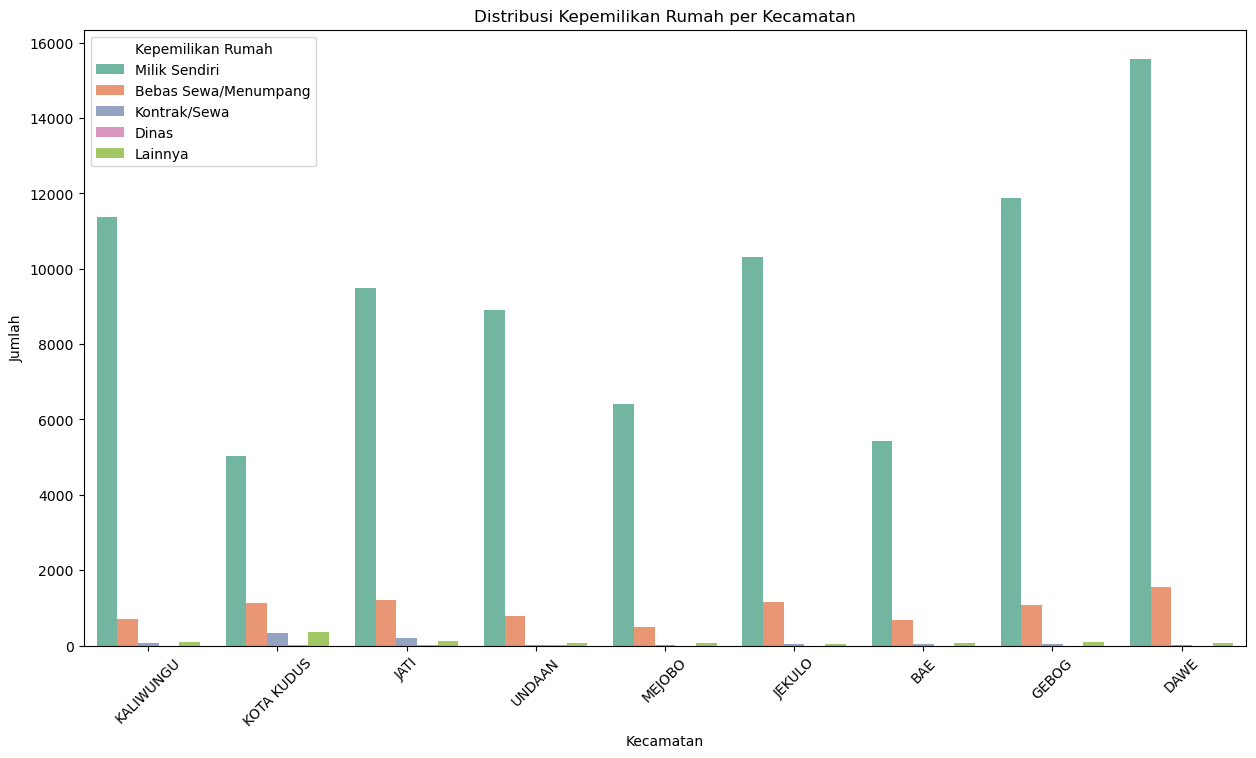

In [284]:
# Plot hubungan antara Kecamatan dan Kepemilikan Rumah
plt.figure(figsize=(15, 8))
sns.countplot(x="Kecamatan", hue="Kepemilikan Rumah", data=df, palette="Set2")
plt.title("Distribusi Kepemilikan Rumah per Kecamatan")
plt.xlabel("Kecamatan")
plt.ylabel("Jumlah")
plt.legend(title="Kepemilikan Rumah")
plt.xticks(rotation=45)
plt.show()

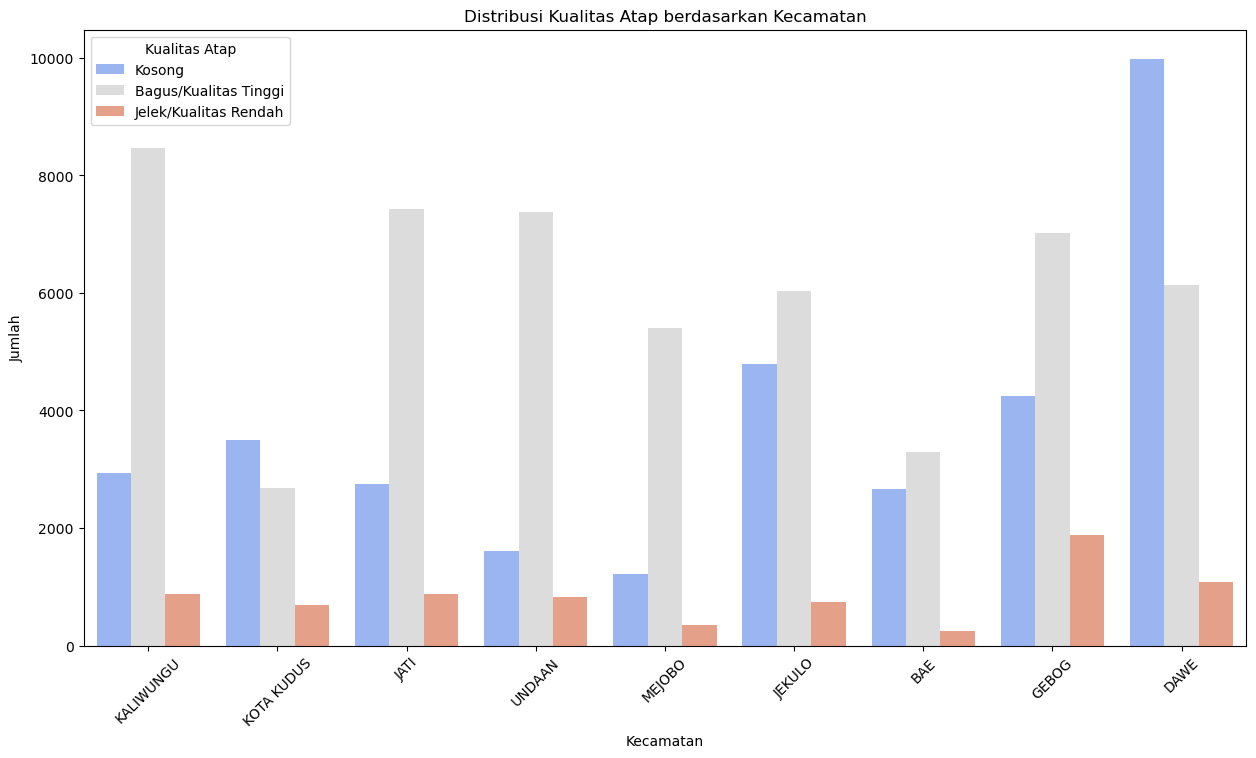

In [285]:
# Plot 2: Kualitas Atap berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Kualitas Atap', data=df, palette='coolwarm')
plt.title('Distribusi Kualitas Atap berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Kualitas Atap')
plt.xticks(rotation=45)
plt.show()

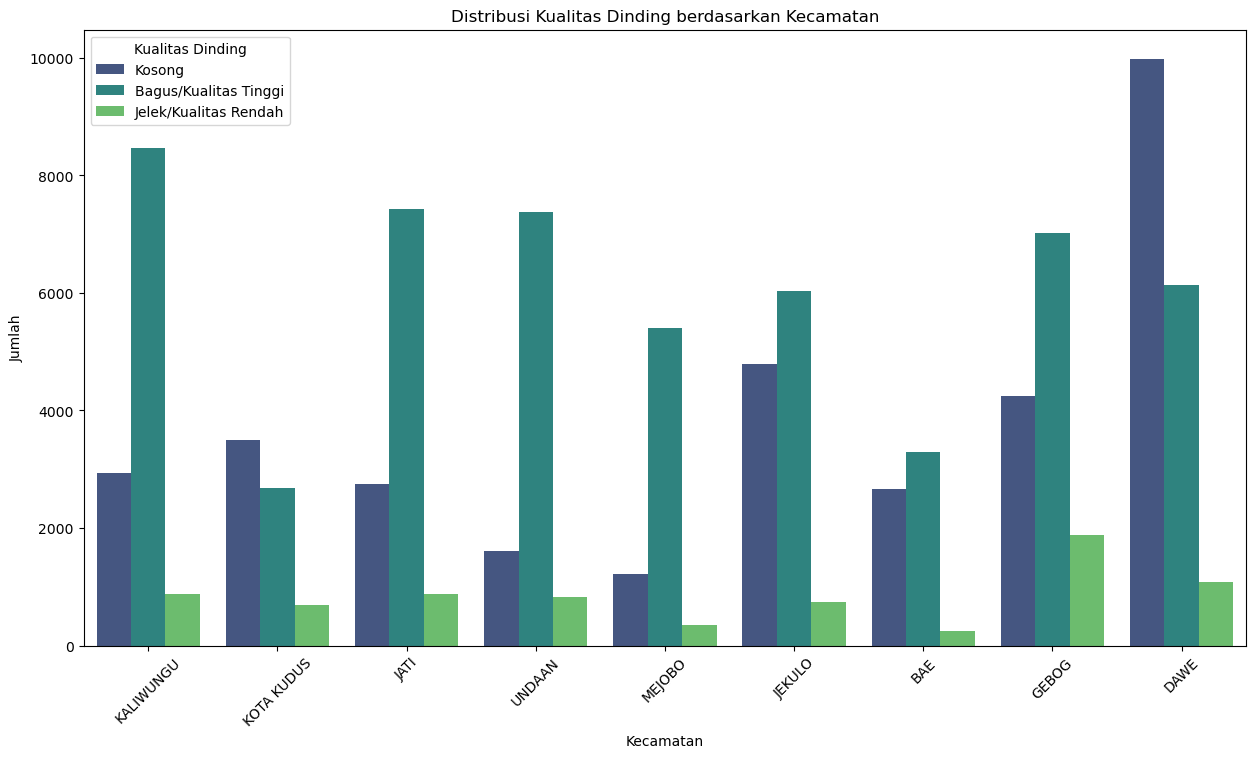

In [286]:
# Plot 3: Kualitas Dinding berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Kualitas Dinding', data=df, palette='viridis')
plt.title('Distribusi Kualitas Dinding berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Kualitas Dinding')
plt.xticks(rotation=45)
plt.show()

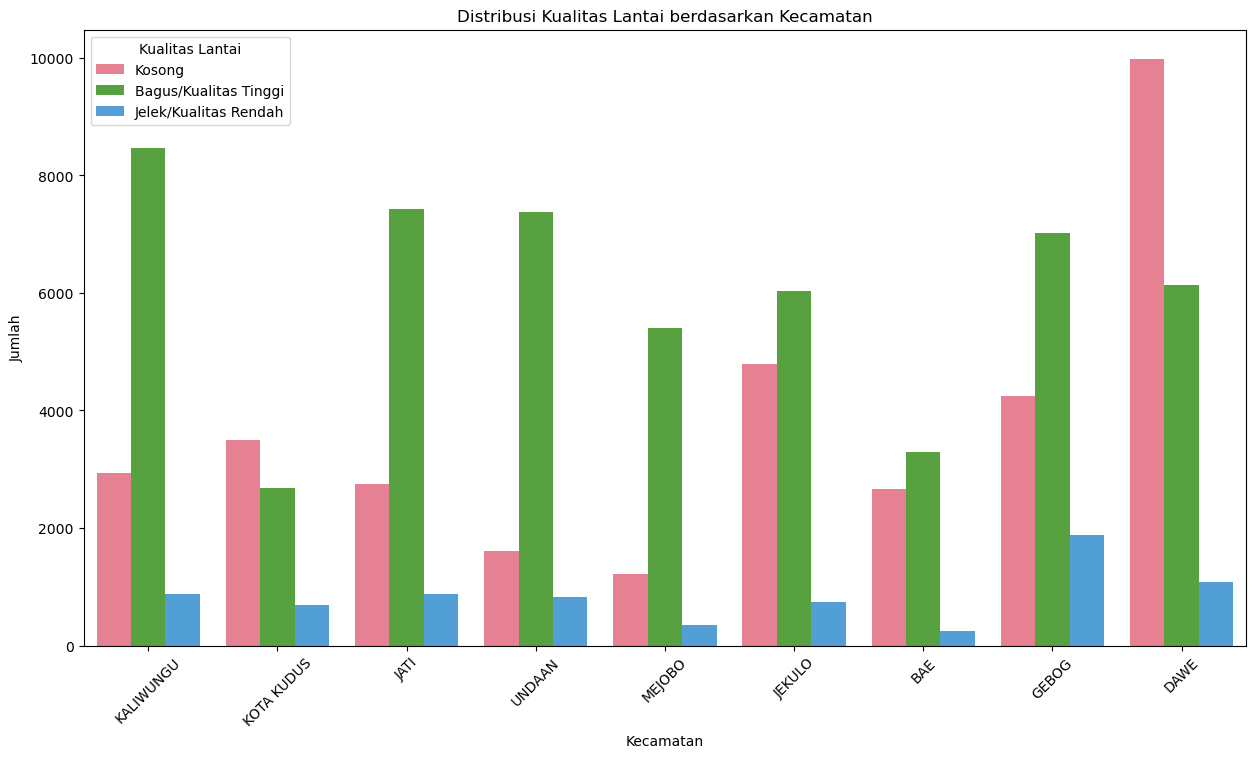

In [287]:
# Plot 4: Kualitas Lantai berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Kualitas Lantai', data=df, palette='husl')
plt.title('Distribusi Kualitas Lantai berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Kualitas Lantai')
plt.xticks(rotation=45)
plt.show()

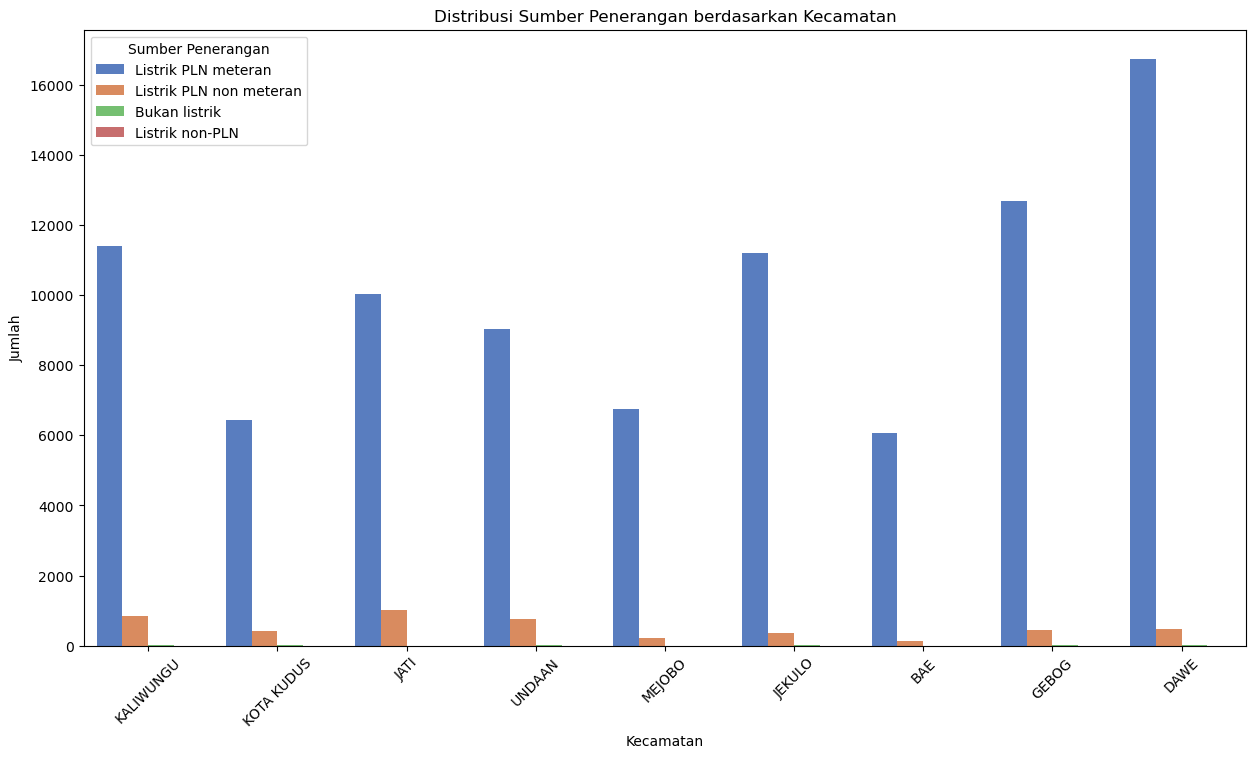

In [288]:
# Plot 5: Sumber Penerangan berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Sumber Penerangan', data=df, palette='muted')
plt.title('Distribusi Sumber Penerangan berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Sumber Penerangan')
plt.xticks(rotation=45)
plt.show()

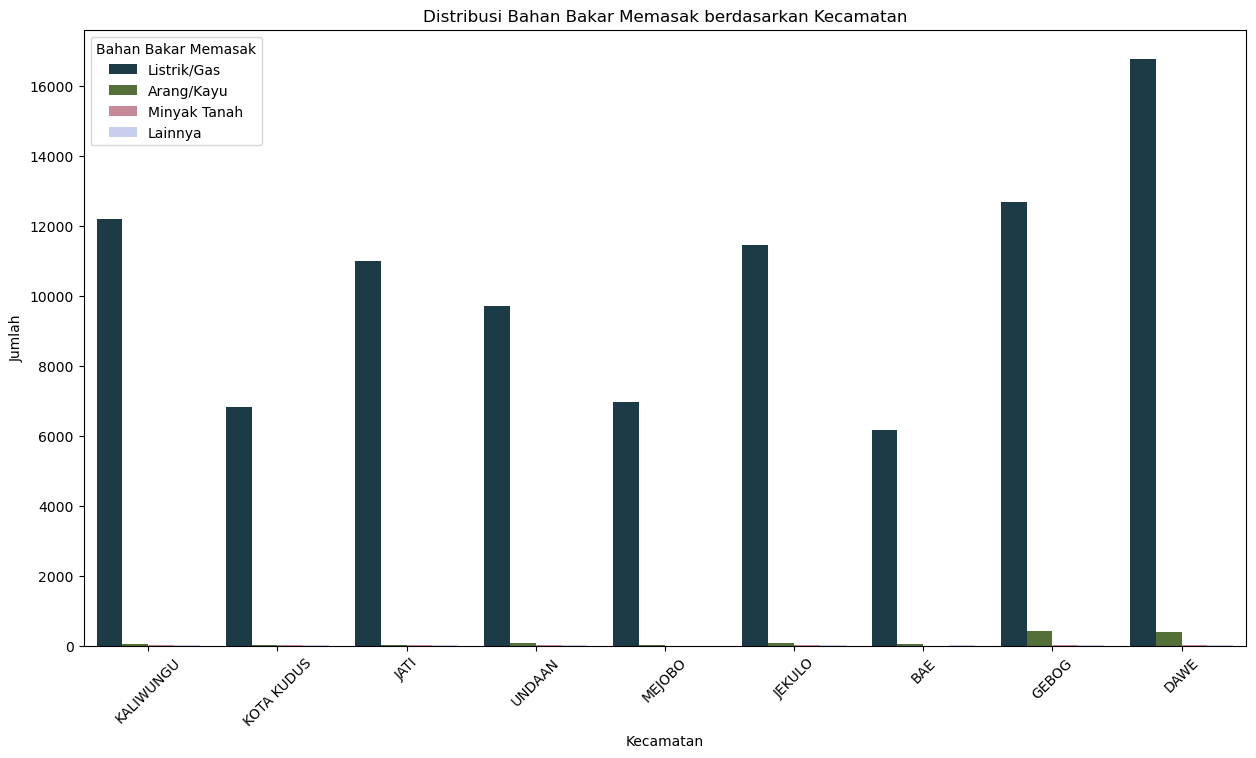

In [289]:
# Plot 6: Bahan Bakar Memasak berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Bahan Bakar Memasak', data=df, palette='cubehelix')
plt.title('Distribusi Bahan Bakar Memasak berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Bahan Bakar Memasak')
plt.xticks(rotation=45)
plt.show()

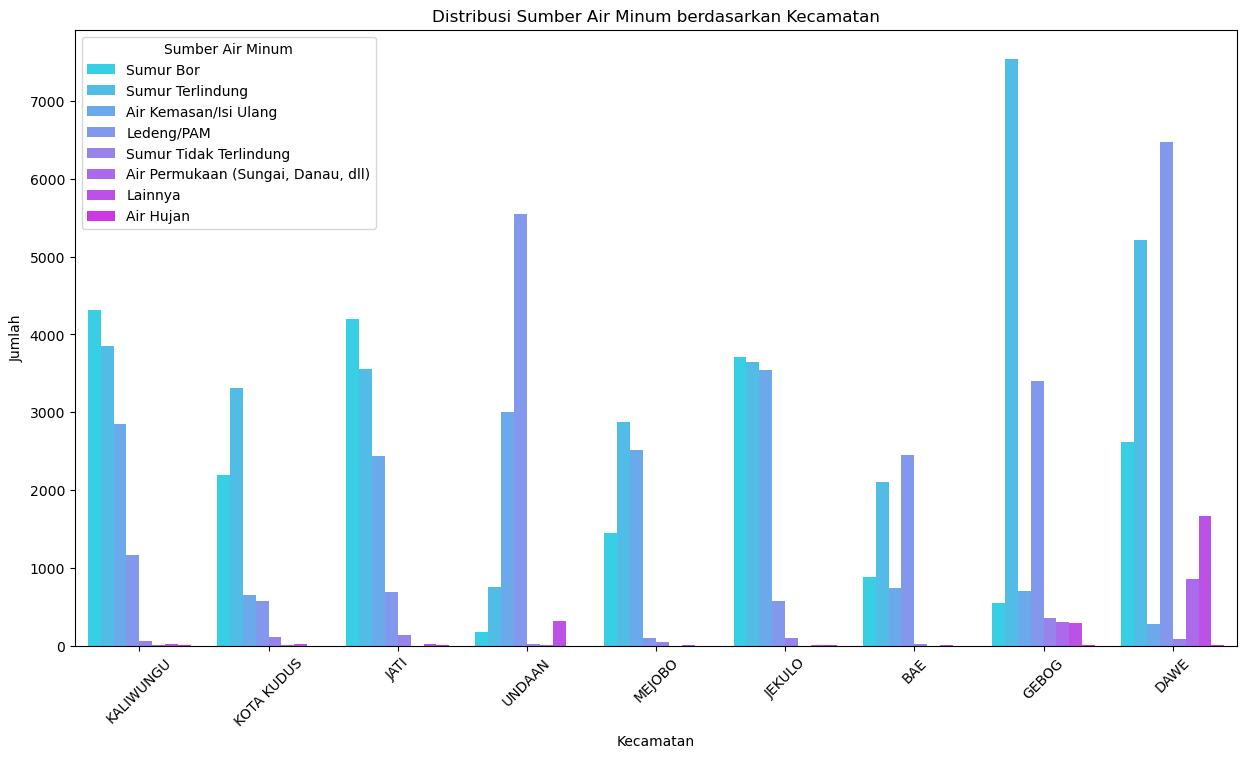

In [290]:
# Plot 7: Sumber Air Minum berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Sumber Air Minum', data=df, palette='cool')
plt.title('Distribusi Sumber Air Minum berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Sumber Air Minum')
plt.xticks(rotation=45)
plt.show()

In [291]:
# Step 2: Encoding Variabel Kategorikal Menjadi Numerik
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # Jika kolomnya bertipe object (kategorikal)
        df[column] = le.fit_transform(df[column])


In [292]:
# Step 2: Memilih variabel numerik yang relevan untuk klasterisasi
X = df_cleaned[["Kecamatan", "Kepemilikan Rumah", "Kualitas Atap", "Kualitas Dinding",
        "Kualitas Lantai", "Sumber Penerangan", "Bahan Bakar Memasak", "Sumber Air Minum"]]

C:\Users\ARUM MAULIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


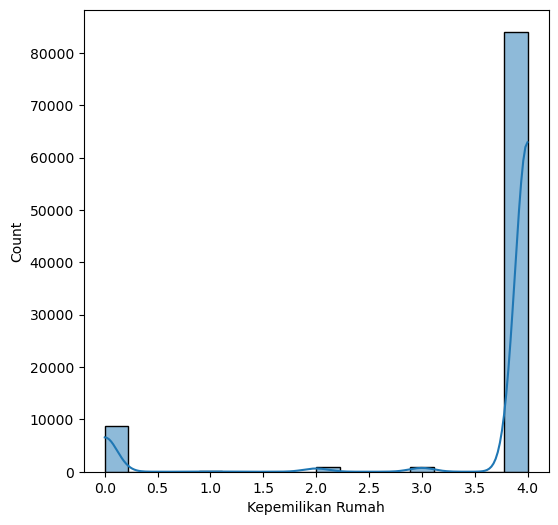

In [293]:
plt.figure(figsize=(6, 6))
sns.histplot(df_cleaned["Kepemilikan Rumah"], kde=True)
plt.xlabel("Kepemilikan Rumah")
plt.show()

C:\Users\ARUM MAULIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


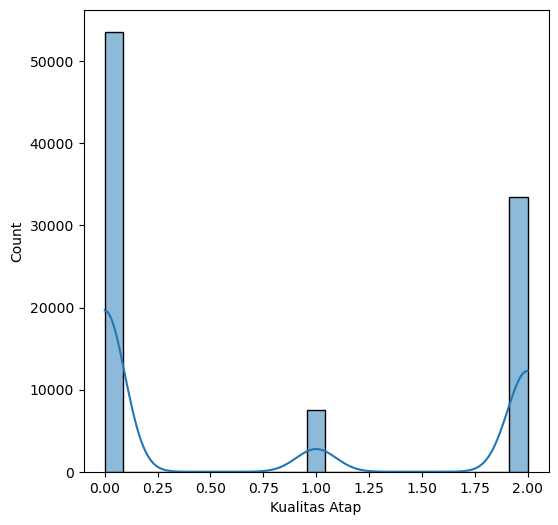

In [294]:
plt.figure(figsize=(6, 6))
sns.histplot(df_cleaned["Kualitas Atap"], kde=True)
plt.xlabel("Kualitas Atap")
plt.show()

C:\Users\ARUM MAULIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


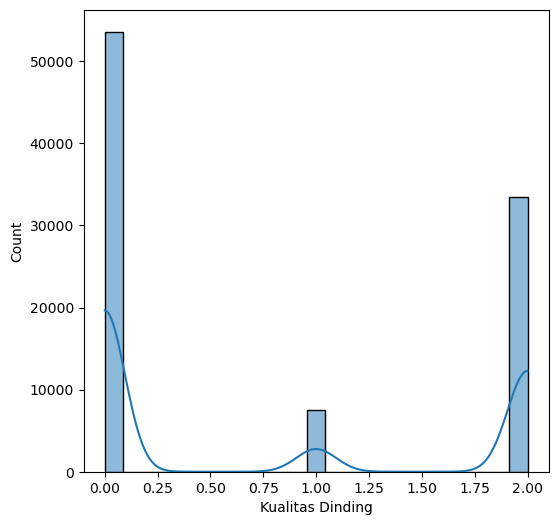

In [295]:
plt.figure(figsize=(6, 6))
sns.histplot(df_cleaned["Kualitas Dinding"], kde=True)
plt.xlabel("Kualitas Dinding")
plt.show()

C:\Users\ARUM MAULIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


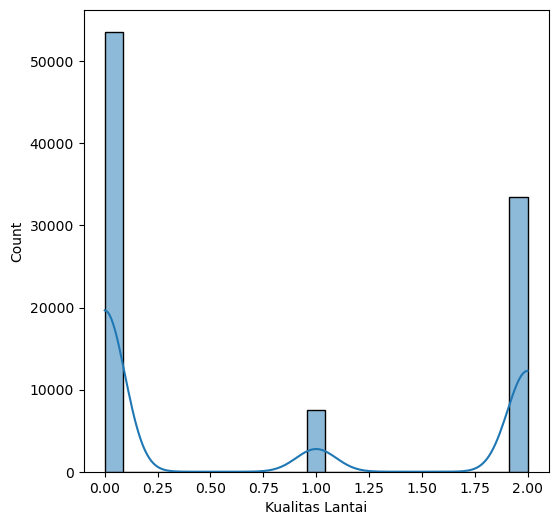

In [296]:
plt.figure(figsize=(6, 6))
sns.histplot(df_cleaned["Kualitas Lantai"], kde=True)
plt.xlabel("Kualitas Lantai")
plt.show()

C:\Users\ARUM MAULIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


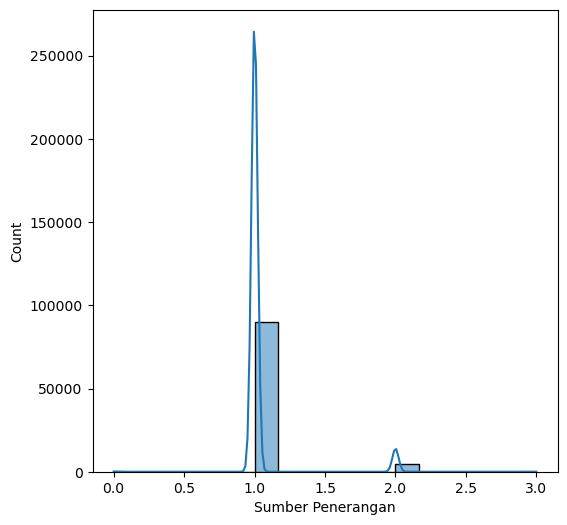

In [297]:
plt.figure(figsize=(6, 6))
sns.histplot(df_cleaned["Sumber Penerangan"], kde=True)
plt.xlabel("Sumber Penerangan")
plt.show()

C:\Users\ARUM MAULIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


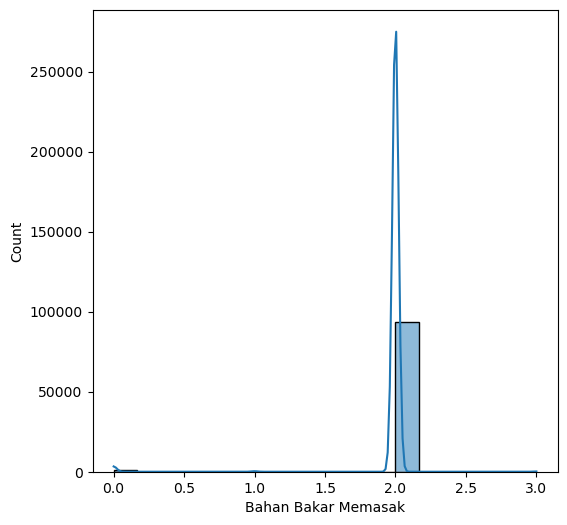

In [298]:
plt.figure(figsize=(6, 6))
sns.histplot(df_cleaned["Bahan Bakar Memasak"], kde=True)
plt.xlabel("Bahan Bakar Memasak")
plt.show()

C:\Users\ARUM MAULIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


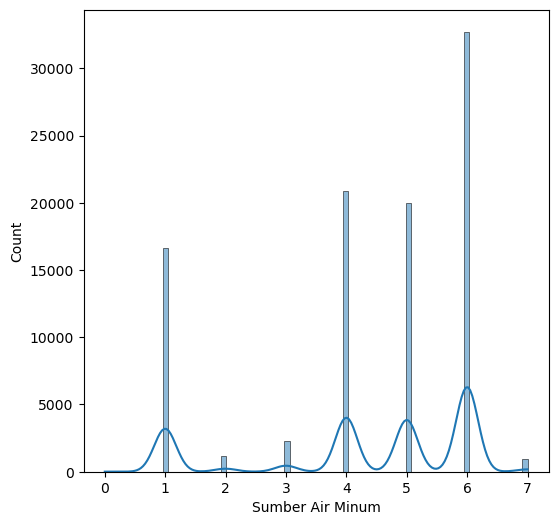

In [299]:
plt.figure(figsize=(6, 6))
sns.histplot(df_cleaned["Sumber Air Minum"], kde=True)
plt.xlabel("Sumber Air Minum")
plt.show()

C:\Users\ARUM MAULIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


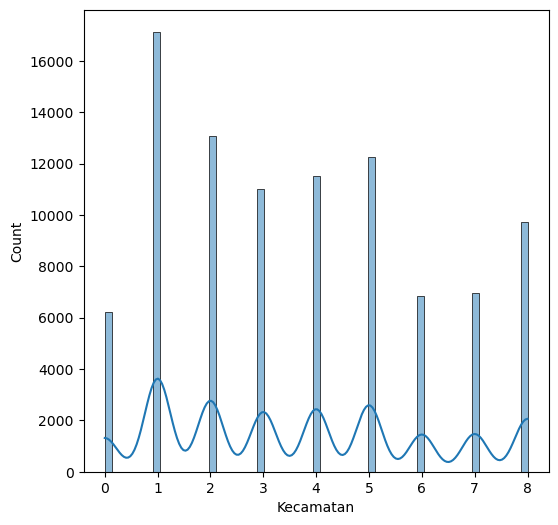

In [300]:
plt.figure(figsize=(6, 6))
sns.histplot(df_cleaned["Kecamatan"], kde=True)
plt.xlabel("Kecamatan")
plt.show()

## Menentukan Jumlah Cluster

C:\Users\ARUM MAULIA\AppData\Local\Temp\ipykernel_12680\391277028.py:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(k_values, inertia, 'bx-', marker='o', color='blue')
C:\Users\ARUM MAULIA\AppData\Local\Temp\ipykernel_12680\391277028.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_values, inertia, 'bx-', marker='o', color='blue')


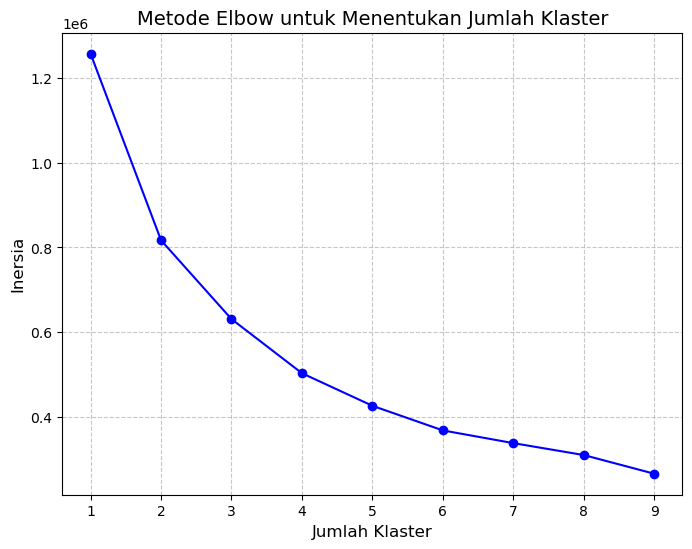

In [301]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Pilih variabel yang relevan untuk klasterisasi
uji = df_cleaned[["Kecamatan", "Kepemilikan Rumah", "Kualitas Atap", "Kualitas Dinding",
                  "Kualitas Lantai", "Sumber Penerangan", "Bahan Bakar Memasak", "Sumber Air Minum"]]

# Step 2: Inisialisasi jumlah klaster yang akan diuji
k_values = range(1, 10)  # Uji jumlah klaster dari 1 hingga 9
inertia = []

# Step 3: Lakukan klasterisasi dengan berbagai jumlah klaster
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Tetapkan random_state untuk hasil yang konsisten
    kmeans.fit(uji)
    inertia.append(kmeans.inertia_)  # Simpan nilai inertia untuk setiap k

# Step 4: Plot nilai inersia terhadap jumlah klaster
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bx-', marker='o', color='blue')
plt.xlabel('Jumlah Klaster', fontsize=12)
plt.ylabel('Inersia', fontsize=12)
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster', fontsize=14)
plt.xticks(k_values)  # Menampilkan semua nilai k pada sumbu x
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Modelling

In [302]:
from sklearn.cluster import KMeans

# Step 1: Pilih variabel yang relevan untuk klasterisasi
uji = df_cleaned[["Kecamatan", "Kepemilikan Rumah", "Kualitas Atap", "Kualitas Dinding",
                  "Kualitas Lantai", "Sumber Penerangan", "Bahan Bakar Memasak", "Sumber Air Minum"]]

# Step 2: Bangun model K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Menentukan jumlah klaster (3 klaster)

# Step 3: Lakukan klasterisasi pada data
kmeans.fit(uji)

# Step 4: Dapatkan label klaster untuk setiap data
cluster_labels = kmeans.labels_

# Step 5: Tambahkan label klaster sebagai kolom baru di DataFrame
df_cleaned["Cluster"] = cluster_labels



In [303]:

df_cleaned.head(35)

,Kecamatan,Desil Kesejahteraan,Persentil,Prioritas Verval,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,...,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR,Cluster
0,5,1,5,2,1,0,8,4,5,3,...,2,1,1,0,0,1,0,1,0,2
1,5,1,3,2,1,1,2,4,5,2,...,2,1,1,0,0,0,0,0,0,2
2,5,1,8,2,0,0,9,4,6,3,...,2,1,0,1,0,0,0,0,1,2
3,5,1,2,2,1,0,9,4,7,3,...,2,2,0,1,0,0,0,0,0,2
4,5,1,7,2,0,1,6,4,5,1,...,2,1,1,0,1,1,1,0,0,2
5,5,1,6,2,0,0,6,4,7,3,...,2,1,0,0,0,0,0,0,1,2
6,5,1,7,2,0,0,3,3,5,3,...,2,2,0,0,0,0,0,1,1,2
7,5,1,3,2,0,0,2,0,5,3,...,2,1,1,0,1,0,1,0,0,2
8,5,1,5,2,0,0,5,5,5,3,...,2,1,1,0,1,0,1,0,0,2
9,5,1,4,2,0,0,5,5,7,3,...,2,2,0,0,0,0,0,0,0,2


In [304]:
# Mengurutkan DataFrame berdasarkan 'Cluster'
sorted_data = df_cleaned.sort_values(by='Cluster')

# Menampilkan beberapa baris pertama untuk memverifikasi
print(sorted_data.head())

# Opsional: Jika Anda ingin menyimpan hasil ke file Excel atau CSV
# sorted_data.to_csv('sorted_clusters.csv', index=False)


       Kecamatan  Desil Kesejahteraan  Persentil  Prioritas Verval  \
30193          8                    1          5                 2   
12931          6                    4         36                 2   
38586          8                    2         20                 2   
12934          6                    4         34                 2   
50493          4                    3         24                 2   

       NIK Kepala Keluarga Padan Kemdagri  Jenis Kelamin Kepala Keluarga  \
30193                                   0                              0   
12931                                   1                              0   
38586                                   1                              0   
12934                                   0                              0   
50493                                   0                              0   

       Pekerjaan Kepala Keluarga  Status Pekerjaan Kepala Keluarga  \
30193                          5                    

## Distribusi Cluster

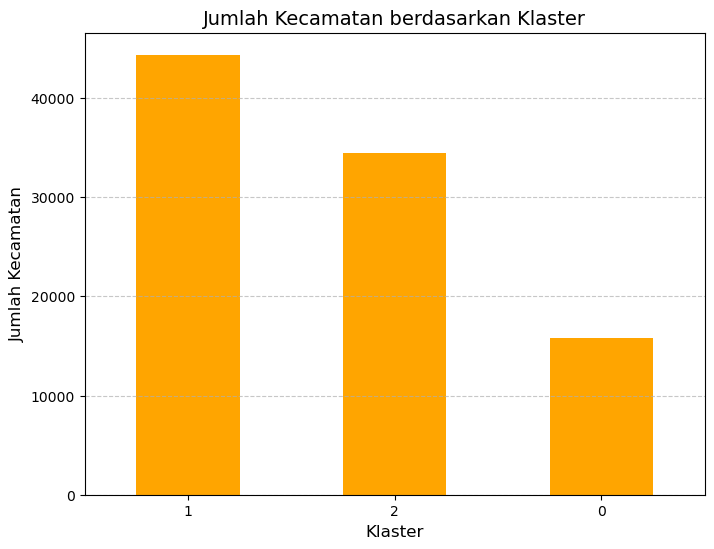

In [305]:
import matplotlib.pyplot as plt

# Membuat bar plot jumlah kecamatan berdasarkan klaster
df_cleaned['Cluster'].value_counts().plot(kind='bar', color='orange', figsize=(8, 6))

# Menambahkan label dan judul
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Jumlah Kecamatan', fontsize=12)
plt.title('Jumlah Kecamatan berdasarkan Klaster', fontsize=14)

# Menampilkan plot
plt.xticks(rotation=0)  # Rotasi label pada sumbu x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


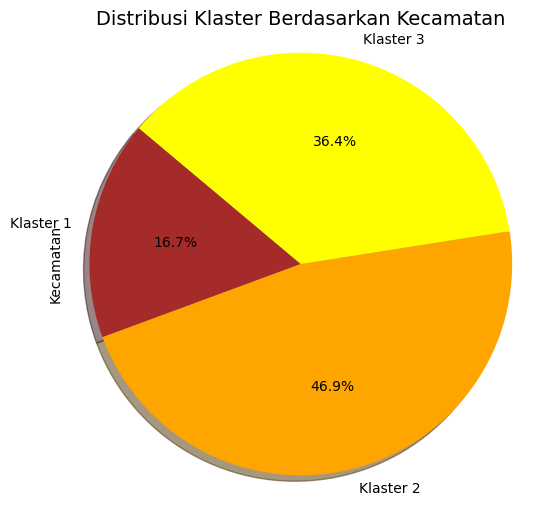

In [306]:
# Membuat pie chart distribusi klaster berdasarkan jumlah kecamatan
ax = df_cleaned.groupby('Cluster')['Kecamatan'].count().plot(
    kind='pie',
    figsize=(6, 6),
    colors=['brown', 'orange', 'yellow'],
    labels=['Klaster 1', 'Klaster 2', 'Klaster 3'],  # Ubah sesuai klaster Anda
    explode=(0, 0, 0),  # Tidak ada klaster yang terpisah
    startangle=140,
    shadow=True,
    autopct=lambda x: '%0.1f%%' % x  # Menampilkan persentase
)

# Menambahkan pengaturan visualisasi
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran sempurna
plt.title('Distribusi Klaster Berdasarkan Kecamatan', fontsize=14)
plt.show()


In [308]:
df_cleaned.head(35)

,Kecamatan,Desil Kesejahteraan,Persentil,Prioritas Verval,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,...,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR,Cluster
0,5,1,5,2,1,0,8,4,5,3,...,2,1,1,0,0,1,0,1,0,2
1,5,1,3,2,1,1,2,4,5,2,...,2,1,1,0,0,0,0,0,0,2
2,5,1,8,2,0,0,9,4,6,3,...,2,1,0,1,0,0,0,0,1,2
3,5,1,2,2,1,0,9,4,7,3,...,2,2,0,1,0,0,0,0,0,2
4,5,1,7,2,0,1,6,4,5,1,...,2,1,1,0,1,1,1,0,0,2
5,5,1,6,2,0,0,6,4,7,3,...,2,1,0,0,0,0,0,0,1,2
6,5,1,7,2,0,0,3,3,5,3,...,2,2,0,0,0,0,0,1,1,2
7,5,1,3,2,0,0,2,0,5,3,...,2,1,1,0,1,0,1,0,0,2
8,5,1,5,2,0,0,5,5,5,3,...,2,1,1,0,1,0,1,0,0,2
9,5,1,4,2,0,0,5,5,7,3,...,2,2,0,0,0,0,0,0,0,2


In [310]:
# Pastikan Anda sudah menginstal library openpyxl jika menyimpan ke Excel
# pip install openpyxl

# Menambahkan kolom Cluster ke DataFrame asli
df_cleaned['Cluster'] = kmeans.labels_

# Menyimpan hasil klasterisasi ke dalam file Excel
df_cleaned.to_excel('hasil_klasterisasi.xlsx', index=False)
print("Hasil klasterisasi berhasil disimpan ke file 'hasil_klasterisasi.xlsx'")


Hasil klasterisasi berhasil disimpan ke file 'hasil_klasterisasi.xlsx'


## 5. HASIL DAN KESIMPULAN

## Pembahasan Hasil Klasterisasi Kecamatan di Kabupaten Kudus
Berdasarkan hasil klasterisasi menggunakan metode K-Means, kecamatan di Kabupaten Kudus berhasil dikelompokkan ke dalam tiga klaster berdasarkan tingkat kemiskinan dan karakteristik sosial-ekonomi rumah tangga. Berikut adalah pembahasannya:

1. Kecamatan dalam Klaster 0: "Miskin"
Kecamatan: Undaan
Kecamatan Undaan termasuk dalam klaster "miskin", yang mengindikasikan bahwa mayoritas penduduk di wilayah ini memiliki kondisi sosial-ekonomi yang paling rentan. Ciri khas klaster ini adalah:

Kualitas rumah tangga, seperti atap, dinding, dan lantai, berada dalam kondisi kurang memadai.
Ketergantungan pada sumber penerangan dan bahan bakar memasak yang belum modern.
Akses terhadap sumber air minum berkualitas rendah.
Wilayah ini memerlukan perhatian khusus, termasuk program bantuan sosial, peningkatan akses layanan dasar, serta perbaikan infrastruktur untuk meningkatkan kualitas hidup masyarakat.

2. Kecamatan dalam Klaster 1: "Rentan Miskin"
Kecamatan: Jati, Bae, Gebog, Dawe
Kecamatan-kecamatan ini berada dalam kategori "rentan miskin", yang berarti kondisi sosial-ekonomi lebih baik dibandingkan klaster "miskin" tetapi masih memiliki risiko tinggi untuk jatuh ke dalam kemiskinan. Karakteristik klaster ini meliputi:

Beberapa rumah tangga memiliki kualitas tempat tinggal yang sedang hingga memadai.
Sumber penerangan dan bahan bakar memasak cenderung lebih baik, tetapi masih terdapat ketergantungan pada sumber energi tradisional.
Akses air minum sebagian besar sudah memadai, tetapi belum sepenuhnya merata.
Upaya yang dapat dilakukan di wilayah ini meliputi program pemberdayaan ekonomi, peningkatan akses pendidikan, serta pelatihan keterampilan untuk mencegah kerentanan yang lebih besar.

3. Kecamatan dalam Klaster 2: "Mampu"
Kecamatan: Kaliwungu, Kudus, Mejobo, Jekulo
Kecamatan-kecamatan ini termasuk dalam klaster "mampu", yang menunjukkan bahwa mayoritas penduduk di wilayah ini memiliki kondisi sosial-ekonomi yang relatif stabil dan tidak terlalu terpengaruh oleh risiko kemiskinan. Karakteristik utama klaster ini meliputi:

Kualitas tempat tinggal, seperti atap, dinding, dan lantai, sudah dalam kondisi baik.
Sumber penerangan modern (listrik) dan bahan bakar memasak yang lebih efisien (gas).
Akses terhadap sumber air minum berkualitas tinggi sudah memadai.

## Kesimpulan
Hasil klasterisasi ini memberikan gambaran yang jelas tentang kondisi sosial-ekonomi di kecamatan-kecamatan Kabupaten Kudus:
Klaster 0 ("Miskin"): Kecamatan Undaan yang memerlukan perhatian intensif.
Klaster 1 ("Rentan Miskin"): Kecamatan Jati, Bae, Gebog, dan Dawe yang perlu didukung untuk mengurangi risiko jatuh ke dalam kemiskinan.
Klaster 2 ("Mampu"): Kecamatan Kaliwungu, Kudus, Mejobo, dan Jekulo yang menunjukkan kondisi sosial-ekonomi relatif stabil.